In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
import keras

import re
import string
import nltk
from nltk.stem import PorterStemmer
from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from wordcloud import WordCloud

In [21]:
data_balanced = pd.read_csv('C:/Users/isha/OneDrive/My Stuff/University/VIT/Sem 6/CSE projects/nlp/Implementation/SARC/train-balanced-sarcasm.csv', low_memory=False)

In [22]:
data_balanced.apply(lambda x: sum(x.isnull()),axis=0)

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [23]:
print('Number of Duplicate rows in the dataset:',len(data_balanced[data_balanced.duplicated() == True]))

 ### removing duplicate rows

print('number of duplicates after score correction: ',len(data_balanced[data_balanced.duplicated() == True]))
data_balanced.drop_duplicates(keep='first',inplace=True)

## score calculated as number of ups - downs
data_balanced['score'] = data_balanced['ups'] - data_balanced['downs']

Number of Duplicate rows in the dataset: 28
number of duplicates after score correction:  28


# Data Preprocessing and Cleaning

In [24]:
# https://stackoverflow.com/a/47091490/408403
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

def preprocess_text(text_data):
    '''Function performs decontraction,punctuation removal,stop words removal,stemming words'''
    preprocessed_text = []
    # tqdm is for printing the status bar
    porter = PorterStemmer()
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        #https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
        exclude = set(string.punctuation)
        sent = ''.join(ch for ch in sent if ch not in exclude)    
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(porter.stem(e) for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [25]:
## printing random text data point
print(data_balanced['parent_comment'].iloc[45])
print(data_balanced['parent_comment'].iloc[1179])
print(data_balanced['parent_comment'].iloc[18])

Anyone else think that it was interesting the way she mentioned that she had a tape recorder in her hand while he was assaulting her...
Woah woah woah man, back up. You think Trump read the op-ed? I was thinking something like.. Twitter cliff's notes, Twiff's notes, if you will.
Clinton struggles to gain traction in Florida, despite spending - Clinton shocked money can't buy everything


In [26]:
### preprocessing the featured comment
preprocessed_parent_comment = preprocess_text(data_balanced['parent_comment'].values)

100%|██████████| 1010798/1010798 [04:31<00:00, 3718.18it/s]


In [27]:
data_balanced['processed_parent_comment'] = preprocessed_parent_comment

In [28]:
print(data_balanced['processed_parent_comment'].iloc[45])
print(data_balanced['processed_parent_comment'].iloc[1179])
print(data_balanced['processed_parent_comment'].iloc[18])

anyon els think interest way mention tape record hand assault
woah woah woah man back think trump read ope think someth like twitter cliff note twiff note
clinton struggl gain traction florida despit spend clinton shock money not buy everyth


In [29]:
data_balanced['processed_author'] = [e.lower().strip().replace('_','').replace('-','') for e in data_balanced['author'].values]
data_balanced['processed_subreddit'] = [e.lower().strip().replace('_','').replace('-','').replace('.','dot') for e in data_balanced['subreddit'].values]

In [30]:
### random points
print(data_balanced['subreddit'])

0                    politics
1                         nba
2                         nfl
3          BlackPeopleTwitter
4          MaddenUltimateTeam
                  ...        
1010821            reddit.com
1010822               climate
1010823               atheism
1010824             worldnews
1010825              politics
Name: subreddit, Length: 1010798, dtype: object


In [31]:
### converting all upper and lower case to uniform lower and stripping
data_balanced['processed_subreddit'] = [e.lower().strip().replace('-','').replace('.','dot')
                                       for e in data_balanced['subreddit'].values]

In [32]:
print(data_balanced['processed_subreddit'])

0                    politics
1                         nba
2                         nfl
3          blackpeopletwitter
4          maddenultimateteam
                  ...        
1010821          redditdotcom
1010822               climate
1010823               atheism
1010824             worldnews
1010825              politics
Name: processed_subreddit, Length: 1010798, dtype: object


In [33]:
df_sarcasm = data_balanced.loc[data_balanced['label']==1]
df_non_sarcasm = data_balanced.loc[data_balanced['label']==0]

In [35]:
nlp.max_length = 3000000

df_sarcasm = df_sarcasm.sample(50000,replace=False,random_state=1)
df_sarcasm['comment'] = df_sarcasm['comment'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_sarcasm_text = df_sarcasm['comment'].tolist()
df_sarcasm_text = " ".join(df_sarcasm_text)

sarcasm_doc = nlp(df_sarcasm_text)


df_non_sarcasm  = df_non_sarcasm.sample(50000,replace=False,random_state=1)
df_non_sarcasm['comment'] = df_non_sarcasm['comment'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_non_sarcasm_text = df_non_sarcasm['comment'].tolist()
df_non_sarcasm_text = " ".join(df_non_sarcasm_text)

non_sarcasm_doc = nlp(df_non_sarcasm_text)

In [36]:
# avg of the word len for sarcastic and non sarcastic comments

def average(doc):
    average_word_length =sum(len(word) for word in doc) / len(doc)
    return (average_word_length)

print(f"Average word length of sarcastic comments: {average(sarcasm_doc)}")
print(f"Average word length of non sarcastic comments: {average(non_sarcasm_doc)}")

Average word length of sarcastic comments: 4.381012215885856
Average word length of non sarcastic comments: 4.264743692945759


The avg word len in English is 4 so there is no deviation here.

In [37]:
# avg sentence length for sarcastic and non sarcastic comment

print(f"The average sentence length for sarcastic comments is: {(len(df_sarcasm['comment'].sum())/len(df_sarcasm))}")
print(f"The average sentence length for non sarcastic comments is: {(len(df_non_sarcasm['comment'].sum())/len(df_non_sarcasm))}")

The average sentence length for sarcastic comments is: 40.7785
The average sentence length for non sarcastic comments is: 41.09282


Sarcastic comments don't tend to be much shorter or longer that non sarcastic comments

Sarcastic comments often tend to contain exclamation marks(!), used to express incredulity

In [38]:
def count_character_type(str):
    specialChar = 0
    for i in range(0, len(str)):
        ch = str[i]
        if ch == "!":
            specialChar+=1
        
    return specialChar

excl_count_sarcasm = count_character_type(df_sarcasm_text)
excl_count_non = count_character_type(df_non_sarcasm_text)

print(f"Count of exclamation marks for sarcastic comments: {excl_count_sarcasm}")
print(f"Count of exclamation marks for non sarcastic comments: {excl_count_non}")

Count of exclamation marks for sarcastic comments: 6828
Count of exclamation marks for non sarcastic comments: 2727


A substantial difference of more than 4000, so an excess of "!" marks could be a good predictor to detect sarcasm

The python NLP library, TextBlob has a method to roughly quantify if a sentence is fact or opinion.
The method outputs a number ranging from 0 to 1, an output close to 0 indicates the sentence is highly factual and close to one means the sentence is highly subjective.
Here, we take the sum for every comment, an overall higher sum then, will be indicative of higher subjectivity

In [45]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df_sarcasm['Subjectivity'] = df_sarcasm['comment'].astype(str).apply(get_subjectivity)
df_non_sarcasm['Subjectivity'] = df_non_sarcasm['comment'].astype(str).apply(get_subjectivity)

print(f"Subjectivity score for sarcastic comments:{df_sarcasm['Subjectivity'].sum()}")
print(f"Subjectivity score for for non sarcastic comments: {df_non_sarcasm['Subjectivity'].sum()}")

Subjectivity score for sarcastic comments:16529.627120821846
Subjectivity score for for non sarcastic comments: 15225.067479453392


So, sarcastic comments have a higher degree of subjectivity overall, this is to be expected as the goal of sarcasm is antithetical to being factual

The distribution of the 4 most important parts-of-speech (Noun, Verb, Adjective, Pronoun) in sarcastic and non sarcastic comments might shed some light.

C:\Users\isha\AppData\Local\Temp\ipykernel_23352\2360025240.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined = sarcasm_pos_df.append(non_sarcasm_pos_df)
C:\Users\isha\AppData\Local\Temp\ipykernel_23352\2360025240.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


Text(0.5, 0.98, 'Part-of-Speech Composition')

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


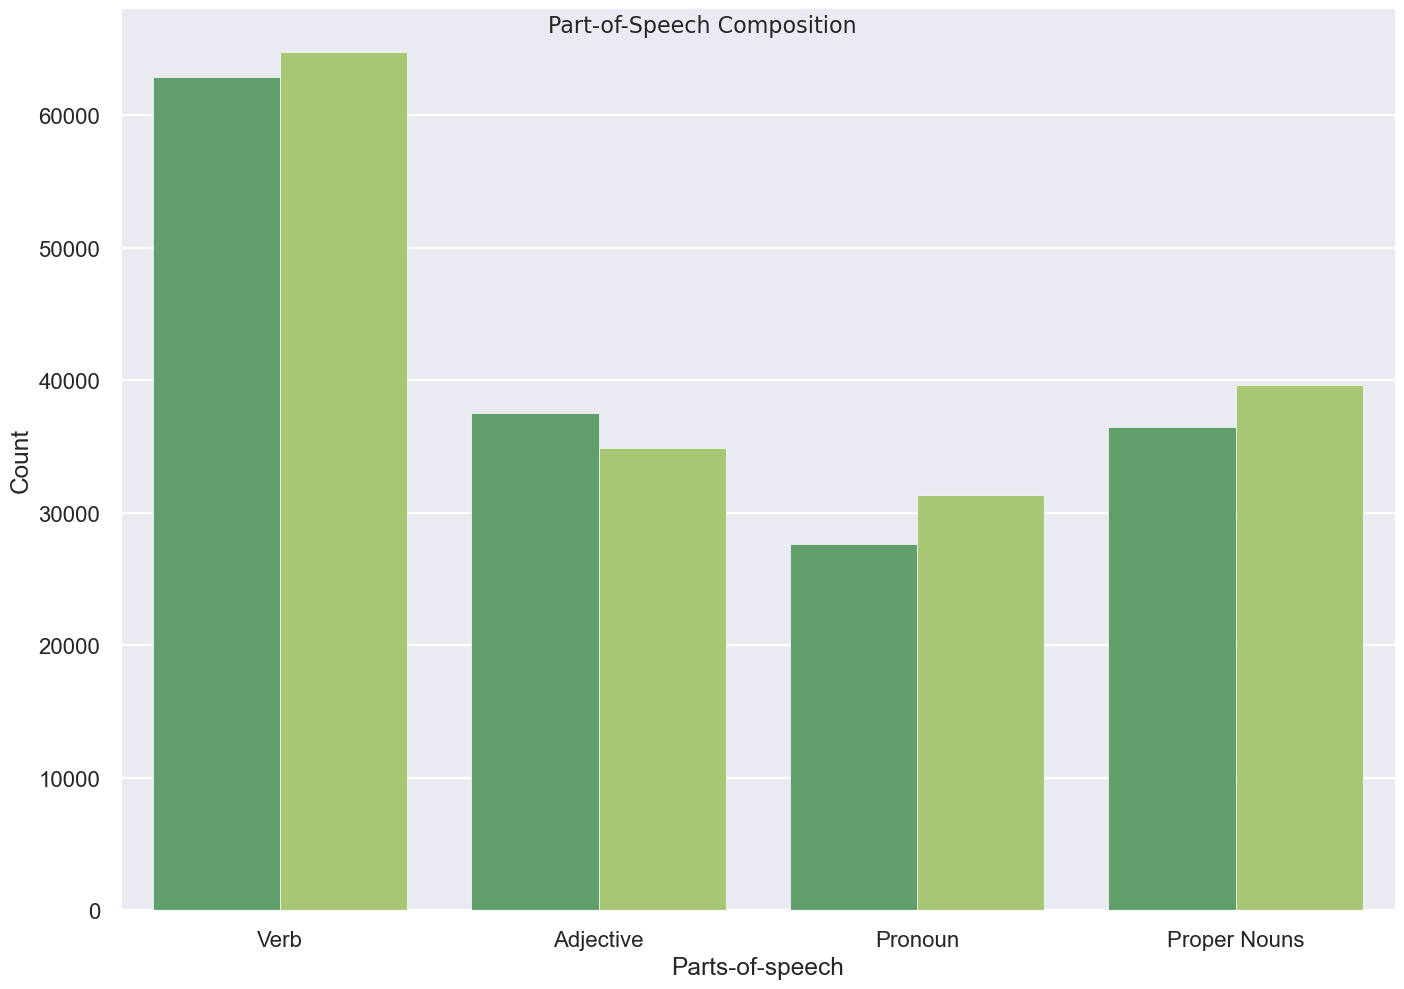

In [48]:
def pos_counter(doc):
    verb_count = 0
    adj_count = 0
    pron_count = 0
    noun_count=0
    for tok in doc:
        if tok.pos_ == "VERB":
            verb_count=verb_count+1
        elif tok.pos_ == "ADJ":
            adj_count=adj_count+1
        elif tok.pos_ == "PRON":
            pron_count=pron_count+1
        elif tok.pos_ == "PROPN":
            noun_count=noun_count+1
    return (verb_count,adj_count,pron_count,noun_count)

sarcasm_pos_list = list(pos_counter(sarcasm_doc))
non_sarcasm_pos_list = list(pos_counter(non_sarcasm_doc))

sarcasm_pos_df = {'Parts-of-speech':['Verb', 'Adjective', 'Pronoun', 'Proper Nouns'],
        'Count':sarcasm_pos_list}

non_sarcasm_pos_df = {'Parts-of-speech':['Verb', 'Adjective', 'Pronoun', 'Proper Nouns'],
        'Count':non_sarcasm_pos_list}

sarcasm_pos_df = pd.DataFrame(sarcasm_pos_df)
non_sarcasm_pos_df = pd.DataFrame(non_sarcasm_pos_df)

sarcasm_pos_df['Type'] = "Sarcasm"
non_sarcasm_pos_df['Type'] = 'Non Sarcasm'

joined = sarcasm_pos_df.append(non_sarcasm_pos_df)

sns.set_style('darkgrid')
style.use('seaborn-poster')

plot = sns.catplot(
    data=joined, kind="bar",
    x="Parts-of-speech", y="Count", hue="Type",
    palette="summer",height=10, aspect=11.7/8.27, legend=False
)

plot.fig.suptitle("Part-of-Speech Composition",
                  fontsize=16, fontdict={"weight": "light"},fontfamily='Lato')

#plt.savefig('Part-of-speech.png')

There is a count difference of 3k for every part-of-speech here, probably due to the non sarcastic comments being longer than sarcastic ones.
We can safely assume that there si not much compositional difference between sarcastic and non sarcastic comments

Sorting by subreddit and generating an entity WordCloud for each of them.

A subreddit revolves around a particular topic, so while we might not see much variance in the syntax of the sarcastic comments across subreddits; there is a lot of variation involved in which entities tend to be included frequently in sarcastic comments

In [54]:
df = data_balanced
df['subreddit'].value_counts()

AskReddit                65675
politics                 39495
worldnews                26377
leagueoflegends          21037
pcmasterrace             18987
                         ...  
LabiaGW                      1
Expected                     1
AnimalsStoppingFights        1
panderingfromtheright        1
Pandemic                     1
Name: subreddit, Length: 14878, dtype: int64

In [55]:
# analysing top 5 subreddits as only those have significant data points

In [56]:
def entity_wordcloud(df):
    named_entities = []
    for sent in df:
        sent = nlp(sent)
        for ent in sent.ents:
            if ent.label_ == 'PERSON' or 'ORG' or 'GPE':
                named_entities.append(ent.text)
            
    doc = " ".join(named_entities)
    
    plt.figure(figsize=(10,5))
    wordcloud = WordCloud(background_color="white",
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(doc)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# AskReddit

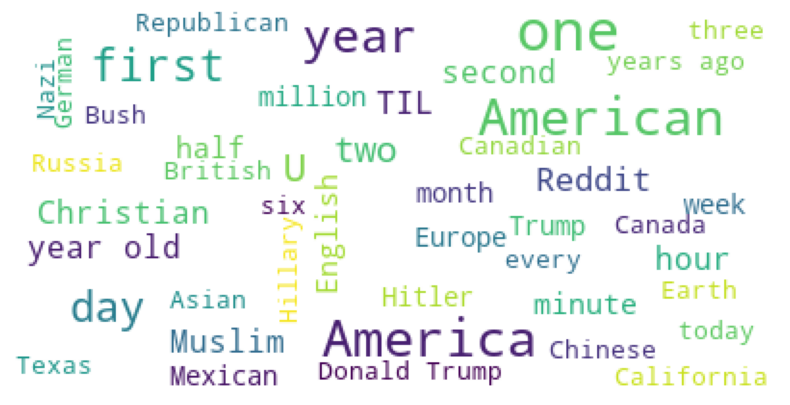

In [60]:
df_askreddit = df.loc[(df['subreddit']=='AskReddit') & (df['label']==1)]
entity_wordcloud(df_askreddit['comment'].astype(str))

AskReddit is a general forum to pose questions, but even here politics dominates. The reason for that could be the Hyper-polarizing 2016 election talk spilling into many subreddits

Terms like - Asian, Chinese, British - indicate nationality. It is not uncommon to see sarcastic comments target at specific demographics

# Worldnews

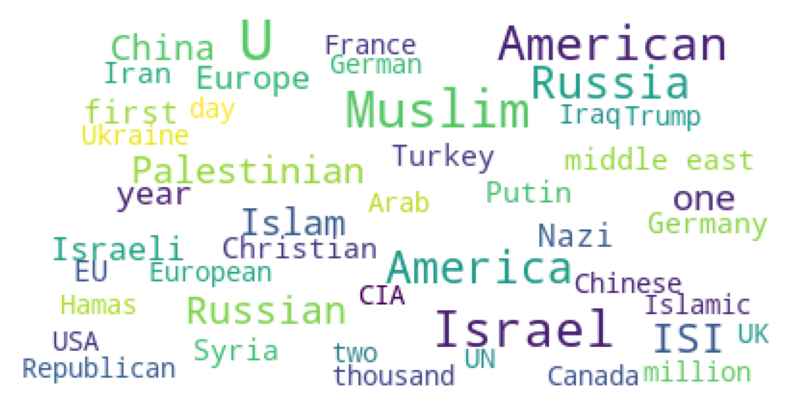

In [61]:
df_worldnews = df.loc[(df['subreddit']=='worldnews') & (df['label']==1)]
entity_wordcloud(df_worldnews['comment'].astype(str))

Most entities from Worldnews subreddit fall into the Geopolitical cateogory

Israel, China, Saudi Arabia are all very polarizing topics - hence the subject of many sarcastic comments

Russian interferance in the 2016 election was a major topic covered  extensively by the media

Islam, Zionist, Muslim are all keywords relating to topics that are perpetually contentious

# PC Master Race

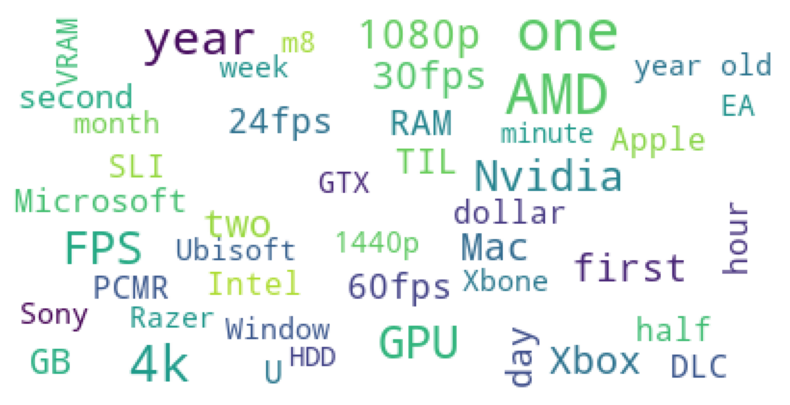

In [62]:
df_pcmasterrace = df.loc[(df['subreddit'] == 'pcmasterrace') & (df['label']==1)]
entity_wordcloud(df_pcmasterrace['comment'].astype(str))

60fps, 4k, Nvidia, Console are all terms that we expect to see in sarcastic comments used by PC gamers

# League of Legends

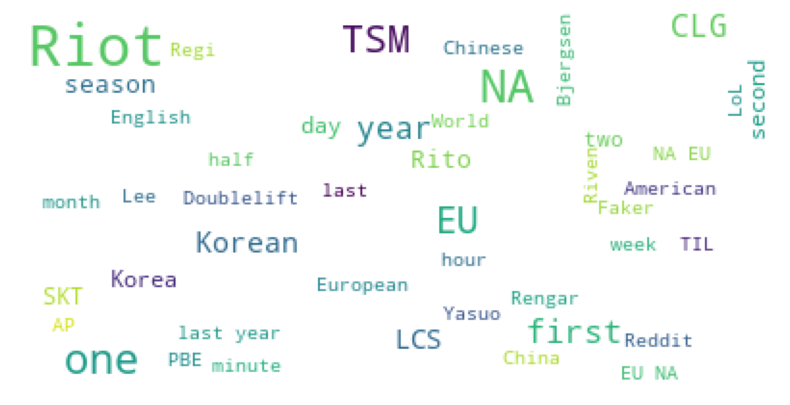

In [63]:
df_league_of_legends = df.loc[(df['subreddit'] == 'leagueoflegends') & (df['label']==1)]
entity_wordcloud(df_league_of_legends['comment'].astype(str))

Korean, Chinese, Americans are some of the most talked about nationalities - probably pertaining to the negative connotation when players trash talk.

TSM, Doublelift, Faker refer to League of Legend teams/elite players, other terms like Yasuo are characters in the game's lore.

# Politics

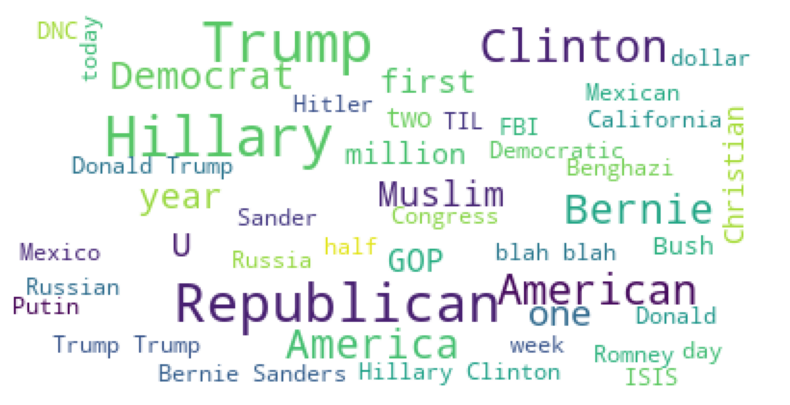

In [64]:
df_politics = df.loc[(df['subreddit'] == 'politics') & (df['label']==1)]
entity_wordcloud(df_politics['comment'].astype(str))

The politics subreddit only contains terms pertaining to American politics

All the inflammatory news stories that characterised the 2016 election seem to be taking the centre stage again